In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob,os
import scipy.ndimage.filters as filters

In [2]:
master_folder='D:\\test_imgs\\'
os.chdir(master_folder)

def readfile(filenumber):
    filename=glob.glob("*.png")[filenumber]
    img=Image.open(master_folder+filename)
    
    # fromstring supposed to be faster.
    # See https://stackoverflow.com/questions/13550376/pil-image-to-array-numpy-array-to-array-python
    imgdata=np.fromstring(img.tobytes(),dtype=np.uint8)
    imgdata=imgdata.reshape((img.size[1],img.size[0]))
    identifier=filename.split(".png")[0]
    timestamp=float(identifier.split("_")[1])/1000.0
    shot=int(identifier.split("_")[3])
    return {'TIMESTAMP':timestamp, 'shot':shot, 'ImageData':imgdata}

In [3]:
print readfile(0)['TIMESTAMP']
print readfile(0)['shot']
print np.shape(readfile(0)['ImageData'])

1503004286.69
0
(450L, 500L)


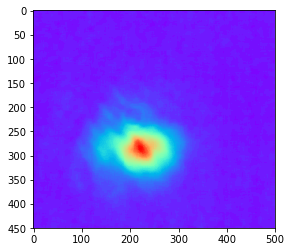

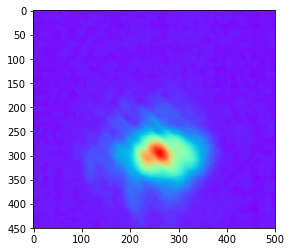

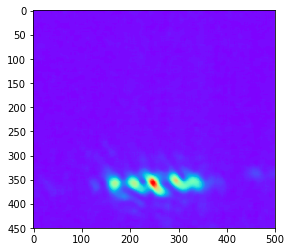

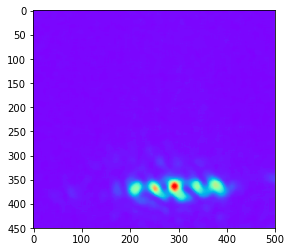

In [15]:
a=0
b=15000
plt.imshow(filters.median_filter(readfile(a)['ImageData'],size=(11,11)),cmap='rainbow')
plt.show()
plt.imshow(filters.median_filter(readfile(b)['ImageData'],size=(11,11)),cmap='rainbow')
plt.show()
plt.imshow(filters.median_filter(readfile(a+1)['ImageData'],size=(11,11)),cmap='rainbow')
plt.show()
plt.imshow(filters.median_filter(readfile(b+1)['ImageData'],size=(11,11)),cmap='rainbow')
plt.show()
#plt.imshow(filters.median_filter(readfile(b)['ImageData'],size=(11,11))-filters.median_filter(readfile(a)['ImageData'],size=(11,11)),cmap='rainbow')
#plt.show()
#plt.imshow(filters.median_filter(readfile(b+1)['ImageData'],size=(11,11))-filters.median_filter(readfile(a+1)['ImageData'],size=(11,11)),cmap='rainbow')
#plt.show()

In [19]:
data=filters.median_filter(readfile(a)['ImageData'],size=(11,11))
[MAX_X,MAX_Y]=np.unravel_index(np.argmax(data),data.shape)
print MAX_X, MAX_Y

283 221
